## Problem Statement

Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs. 

WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. 

Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

Your task is to predict the store sales for each store in the test set for the next two months.

### Step 1: Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor 

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from xgboost import XGBRegressor

### Step 2: Data Inspection

In [2]:
train = pd.read_csv(r"C:\Users\Satyam\Downloads\TRAIN(2).csv")
test = pd.read_csv(r"C:\Users\Satyam\Downloads\TEST_FINAL.csv")

In [3]:
train.head(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [5]:
train.shape,test.shape

((188340, 10), (22265, 8))

### 3.Cleaning Data

##### Checking For Missing Values and Duplicate Value

In [6]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
#Order           0.0
Sales            0.0
dtype: float64

In [7]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
dtype: float64

In [8]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 6
Numerical Features in Train Set: 4


In [9]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 6
Numerical Features in Test Set: 2


In [10]:
train.duplicated().value_counts()

False    188340
dtype: int64

In [11]:
test.duplicated().value_counts()

False    22265
dtype: int64

### 4.Exploring Data

In [12]:
train.corr()

,Store_id,Holiday,#Order,Sales
Store_id,1.000000e+00,5.380970e-16,0.028290,0.004377
Holiday,5.380970e-16,1.000000e+00,-0.140496,-0.154779
#Order,2.828985e-02,-1.404963e-01,1.000000,0.941601
Sales,4.376631e-03,-1.547788e-01,0.941601,1.000000


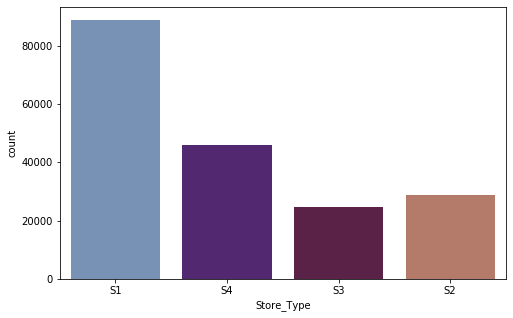

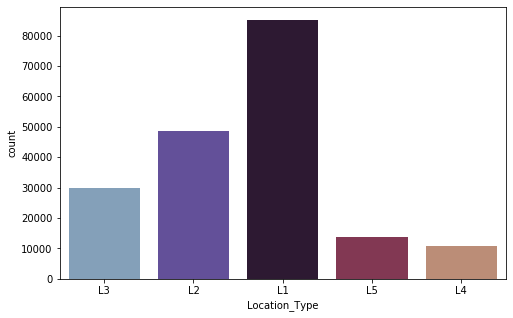

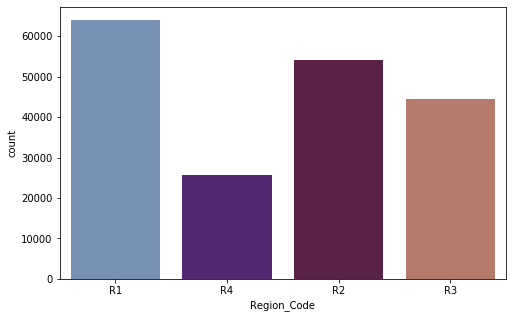

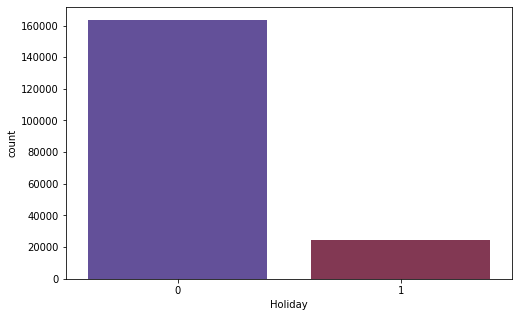

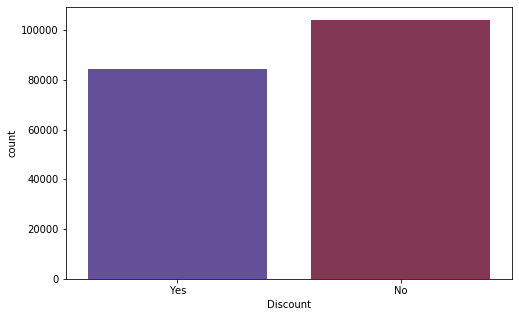

In [13]:
for i in train.columns:
    if(i not in ['ID','Store_id','Date','#Order','Sales']):
        plt.figure(figsize=(8,5))
        sns.countplot(i,data=train,palette='twilight')


### 5.Feature Engineering

In [14]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [15]:
train = pd.get_dummies(train, columns=['Store_Type','Location_Type','Region_Code'],drop_first = True)

In [16]:
test = pd.get_dummies(test, columns=['Store_Type','Location_Type','Region_Code'],drop_first = True)

In [17]:
train.head()

,ID,Store_id,Date,Holiday,Discount,#Order,Sales,Store_Type_1,Store_Type_2,Store_Type_3,Location_Type_1,Location_Type_2,Location_Type_3,Location_Type_4,Region_Code_1,Region_Code_2,Region_Code_3
0,0,1,0,1,1,9,7011.84,0,0,0,0,1,0,0,0,0,0
1,1,253,0,1,1,60,51789.12,0,0,1,1,0,0,0,0,0,0
2,2,252,0,1,1,42,36868.20,0,1,0,1,0,0,0,0,0,0
3,3,251,0,1,1,23,19715.16,1,0,0,0,1,0,0,0,0,0
4,4,250,0,1,1,62,45614.52,1,0,0,0,1,0,0,0,0,1


* __Encoding the required columns from training and test dataset__

In [18]:
train.columns

Index(['ID', 'Store_id', 'Date', 'Holiday', 'Discount', '#Order', 'Sales',
       'Store_Type_1', 'Store_Type_2', 'Store_Type_3', 'Location_Type_1',
       'Location_Type_2', 'Location_Type_3', 'Location_Type_4',
       'Region_Code_1', 'Region_Code_2', 'Region_Code_3'],
      dtype='object')

In [19]:
test.columns

Index(['ID', 'Store_id', 'Date', 'Holiday', 'Discount', 'Store_Type_1',
       'Store_Type_2', 'Store_Type_3', 'Location_Type_1', 'Location_Type_2',
       'Location_Type_3', 'Location_Type_4', 'Region_Code_1', 'Region_Code_2',
       'Region_Code_3'],
      dtype='object')

In [20]:
# Seperate Features and Target
X= train.drop(columns = ['Sales','#Order','ID','Date'], axis=1)
y= train['Sales']

In [21]:
X.columns

Index(['Store_id', 'Holiday', 'Discount', 'Store_Type_1', 'Store_Type_2',
       'Store_Type_3', 'Location_Type_1', 'Location_Type_2', 'Location_Type_3',
       'Location_Type_4', 'Region_Code_1', 'Region_Code_2', 'Region_Code_3'],
      dtype='object')

In [22]:
test.drop(columns = ['ID','Date'], axis=1, inplace=True)

### 6.Model Creation

In [23]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [24]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train,y_train)

rf_random.best_params_

#### ML models

In [26]:
algos = [LinearRegression(),  Ridge(), Lasso(),
        KNeighborsRegressor(), DecisionTreeRegressor(), 
        XGBRegressor(objective ='reg:squarederror',seed = 1000,n_estimators=2000,max_depth=50, 
                     eta=0.1, subsample=0.7, colsample_bytree=0.5),RandomForestRegressor(n_estimators=10,min_samples_split=10,
                                                                                       min_samples_leaf=4, max_features='sqrt', max_depth = 90, bootstrap = False ),
        AdaBoostRegressor(),CatBoostRegressor(loss_function='RMSE',iterations=1000, learning_rate=0.1)]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor','XGBOOST','RandomForestRegressor','AdaBoostRegressor','CatBoostRegressor']

MSLE_list = []


In [27]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    MSLE= metrics.mean_squared_log_error(y_valid,y_pred)*1000
    rmse = np.sqrt(MSE)
    MSLE_list.append(MSLE)
   


0:	learn: 17523.0711266	total: 181ms	remaining: 3m
1:	learn: 16689.9268785	total: 220ms	remaining: 1m 49s
2:	learn: 15986.8163264	total: 250ms	remaining: 1m 22s
3:	learn: 15386.1318688	total: 293ms	remaining: 1m 12s
4:	learn: 14885.6884419	total: 323ms	remaining: 1m 4s
5:	learn: 14462.6095365	total: 355ms	remaining: 58.8s
6:	learn: 14104.4045616	total: 399ms	remaining: 56.7s
7:	learn: 13798.6158280	total: 437ms	remaining: 54.2s
8:	learn: 13555.1019047	total: 474ms	remaining: 52.2s
9:	learn: 13341.9369076	total: 534ms	remaining: 52.9s
10:	learn: 13165.4840188	total: 562ms	remaining: 50.5s
11:	learn: 13019.8273347	total: 596ms	remaining: 49.1s
12:	learn: 12893.2703665	total: 631ms	remaining: 47.9s
13:	learn: 12788.8401180	total: 688ms	remaining: 48.4s
14:	learn: 12699.2366407	total: 718ms	remaining: 47.1s
15:	learn: 12628.0209406	total: 749ms	remaining: 46.1s
16:	learn: 12567.4718675	total: 779ms	remaining: 45s
17:	learn: 12492.6704928	total: 813ms	remaining: 44.3s
18:	learn: 12446.37802

153:	learn: 11353.4949656	total: 5.7s	remaining: 31.3s
154:	learn: 11347.6754345	total: 5.74s	remaining: 31.3s
155:	learn: 11345.6593105	total: 5.77s	remaining: 31.2s
156:	learn: 11342.2166582	total: 5.81s	remaining: 31.2s
157:	learn: 11340.1366178	total: 5.83s	remaining: 31.1s
158:	learn: 11335.3575887	total: 5.87s	remaining: 31.1s
159:	learn: 11333.4764395	total: 5.91s	remaining: 31s
160:	learn: 11331.7646845	total: 5.95s	remaining: 31s
161:	learn: 11330.6831154	total: 5.98s	remaining: 30.9s
162:	learn: 11327.0995802	total: 6.03s	remaining: 31s
163:	learn: 11324.8154619	total: 6.06s	remaining: 30.9s
164:	learn: 11324.1530787	total: 6.08s	remaining: 30.8s
165:	learn: 11319.0376520	total: 6.12s	remaining: 30.8s
166:	learn: 11317.6412775	total: 6.15s	remaining: 30.7s
167:	learn: 11313.2725626	total: 6.19s	remaining: 30.7s
168:	learn: 11310.9793904	total: 6.23s	remaining: 30.7s
169:	learn: 11309.9202557	total: 6.28s	remaining: 30.6s
170:	learn: 11305.9713627	total: 6.32s	remaining: 30.6s

304:	learn: 11125.1680799	total: 11.1s	remaining: 25.2s
305:	learn: 11124.9634220	total: 11.1s	remaining: 25.2s
306:	learn: 11123.7872042	total: 11.1s	remaining: 25.2s
307:	learn: 11122.9306410	total: 11.2s	remaining: 25.1s
308:	learn: 11122.7104624	total: 11.2s	remaining: 25.1s
309:	learn: 11120.4448787	total: 11.2s	remaining: 25s
310:	learn: 11119.0738769	total: 11.3s	remaining: 25s
311:	learn: 11118.5923151	total: 11.3s	remaining: 25s
312:	learn: 11117.5465597	total: 11.4s	remaining: 24.9s
313:	learn: 11116.6144751	total: 11.4s	remaining: 24.9s
314:	learn: 11116.3457487	total: 11.4s	remaining: 24.9s
315:	learn: 11114.7067486	total: 11.5s	remaining: 24.8s
316:	learn: 11113.8786058	total: 11.5s	remaining: 24.8s
317:	learn: 11112.8933177	total: 11.5s	remaining: 24.7s
318:	learn: 11111.9725904	total: 11.6s	remaining: 24.7s
319:	learn: 11111.2325377	total: 11.6s	remaining: 24.7s
320:	learn: 11109.3829279	total: 11.6s	remaining: 24.6s
321:	learn: 11108.8625838	total: 11.7s	remaining: 24.6

454:	learn: 11022.1811827	total: 16.7s	remaining: 19.9s
455:	learn: 11021.6803319	total: 16.7s	remaining: 19.9s
456:	learn: 11021.0241881	total: 16.7s	remaining: 19.9s
457:	learn: 11020.4680968	total: 16.8s	remaining: 19.8s
458:	learn: 11020.3850162	total: 16.8s	remaining: 19.8s
459:	learn: 11020.1203144	total: 16.9s	remaining: 19.8s
460:	learn: 11019.8247664	total: 16.9s	remaining: 19.8s
461:	learn: 11019.4051987	total: 16.9s	remaining: 19.7s
462:	learn: 11018.8739059	total: 17s	remaining: 19.7s
463:	learn: 11018.2559943	total: 17s	remaining: 19.6s
464:	learn: 11017.9166550	total: 17s	remaining: 19.6s
465:	learn: 11017.4735653	total: 17.1s	remaining: 19.6s
466:	learn: 11017.2786996	total: 17.1s	remaining: 19.5s
467:	learn: 11016.8296294	total: 17.1s	remaining: 19.5s
468:	learn: 11016.5674312	total: 17.2s	remaining: 19.4s
469:	learn: 11015.9140495	total: 17.2s	remaining: 19.4s
470:	learn: 11015.3375077	total: 17.3s	remaining: 19.4s
471:	learn: 11014.9857249	total: 17.3s	remaining: 19.3

604:	learn: 10969.1384815	total: 22.3s	remaining: 14.5s
605:	learn: 10969.0354307	total: 22.3s	remaining: 14.5s
606:	learn: 10968.9590889	total: 22.3s	remaining: 14.5s
607:	learn: 10968.6225612	total: 22.4s	remaining: 14.4s
608:	learn: 10968.2928595	total: 22.4s	remaining: 14.4s
609:	learn: 10968.0674651	total: 22.5s	remaining: 14.4s
610:	learn: 10967.9917585	total: 22.5s	remaining: 14.3s
611:	learn: 10967.7761090	total: 22.5s	remaining: 14.3s
612:	learn: 10967.4214247	total: 22.6s	remaining: 14.3s
613:	learn: 10967.0522883	total: 22.6s	remaining: 14.2s
614:	learn: 10966.9685969	total: 22.7s	remaining: 14.2s
615:	learn: 10966.7407166	total: 22.7s	remaining: 14.1s
616:	learn: 10966.6338156	total: 22.7s	remaining: 14.1s
617:	learn: 10966.2999062	total: 22.8s	remaining: 14.1s
618:	learn: 10966.0711572	total: 22.8s	remaining: 14.1s
619:	learn: 10965.1303051	total: 22.9s	remaining: 14s
620:	learn: 10964.8670613	total: 22.9s	remaining: 14s
621:	learn: 10964.6047187	total: 22.9s	remaining: 13

753:	learn: 10933.2132994	total: 27.8s	remaining: 9.06s
754:	learn: 10932.9769918	total: 27.8s	remaining: 9.03s
755:	learn: 10932.7644710	total: 27.9s	remaining: 8.99s
756:	learn: 10932.7265707	total: 27.9s	remaining: 8.95s
757:	learn: 10932.6347910	total: 27.9s	remaining: 8.92s
758:	learn: 10932.4563647	total: 28s	remaining: 8.88s
759:	learn: 10932.3181159	total: 28s	remaining: 8.84s
760:	learn: 10932.2413967	total: 28s	remaining: 8.8s
761:	learn: 10931.9300196	total: 28.1s	remaining: 8.76s
762:	learn: 10931.7441883	total: 28.1s	remaining: 8.72s
763:	learn: 10931.5541485	total: 28.1s	remaining: 8.69s
764:	learn: 10931.4831398	total: 28.1s	remaining: 8.65s
765:	learn: 10931.3712322	total: 28.2s	remaining: 8.61s
766:	learn: 10931.2318067	total: 28.2s	remaining: 8.58s
767:	learn: 10931.1652532	total: 28.3s	remaining: 8.54s
768:	learn: 10930.8795848	total: 28.3s	remaining: 8.5s
769:	learn: 10930.4270714	total: 28.4s	remaining: 8.47s
770:	learn: 10930.3837210	total: 28.4s	remaining: 8.43s


904:	learn: 10908.1879794	total: 33.4s	remaining: 3.5s
905:	learn: 10907.9612039	total: 33.4s	remaining: 3.46s
906:	learn: 10907.9046328	total: 33.4s	remaining: 3.43s
907:	learn: 10907.6359951	total: 33.5s	remaining: 3.39s
908:	learn: 10907.5917980	total: 33.5s	remaining: 3.35s
909:	learn: 10907.5071622	total: 33.5s	remaining: 3.32s
910:	learn: 10907.3897350	total: 33.6s	remaining: 3.28s
911:	learn: 10907.0045676	total: 33.6s	remaining: 3.24s
912:	learn: 10906.9251732	total: 33.6s	remaining: 3.21s
913:	learn: 10906.7918178	total: 33.7s	remaining: 3.17s
914:	learn: 10906.6847371	total: 33.7s	remaining: 3.13s
915:	learn: 10906.5786737	total: 33.7s	remaining: 3.09s
916:	learn: 10906.2490681	total: 33.8s	remaining: 3.06s
917:	learn: 10906.1944632	total: 33.8s	remaining: 3.02s
918:	learn: 10906.0822457	total: 33.9s	remaining: 2.98s
919:	learn: 10906.0352773	total: 33.9s	remaining: 2.95s
920:	learn: 10905.9994797	total: 33.9s	remaining: 2.91s
921:	learn: 10905.9312795	total: 34s	remaining: 2

In [28]:
evaluation = pd.DataFrame({'Model': names,'MSLE': MSLE_list})
evaluation

,Model,RMSE
0,Linear Regression,109.003537
1,Ridge Regression,109.003464
2,Lasso Regression,108.997179
3,K Neighbors Regressor,106.980355
4,Decision Tree Regressor,97.001068
5,XGBOOST,97.015914
6,RandomForestRegressor,97.001068
7,AdaBoostRegressor,142.874076
8,CatBoostRegressor,96.775890


### 7.Predicting Data and Saving to CSV

In [ ]:
submission = pd.read_csv(r'C:\Users\Satyam\Downloads\SAMPLE.csv')
#model = XGBRegressor(objective ='reg:squarederror',seed = 1000,n_estimators=1000, max_depth=5, 
#                     eta=0.1, subsample=0.7, colsample_bytree=0.8)
model = RandomForestRegressor(n_estimators=600,min_samples_split=10,min_samples_leaf=4, max_features='sqrt', max_depth = 90, bootstrap = False )
model.fit(X, y)
final_predictions = model.predict(test)
submission['Sales'] = final_predictions
#only positive predictions for the target variable
submission['Sales'] = submission['Sales'].apply(lambda x: 0 if x<0 else x)
submission.to_csv(r'C:\Users\Satyam\Downloads\SAMPLE.csv', index=False)